<a href="https://colab.research.google.com/github/soffiyahabass1/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week4/week_4_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tqdm import tqdm
tqdm(disable=True)  # disable for static export


In [ ]:
import requests
import zipfile
from pathlib import Path

data_path =  Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find{image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)



  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading pixxa, steak, sushi, data")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print ("Unzipping pizza, steak,sushi data..")
    zip_ref.extractall(image_path)

Did not finddata/pizza_steak_sushi directory, creating one...
downloading pixxa, steak, sushi, data
Unzipping pizza, steak,sushi data..


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'." )

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [ ]:
train_dir = image_path /"train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/3727036.jpg
Image class: steak
Image height: 289
Image width: 512


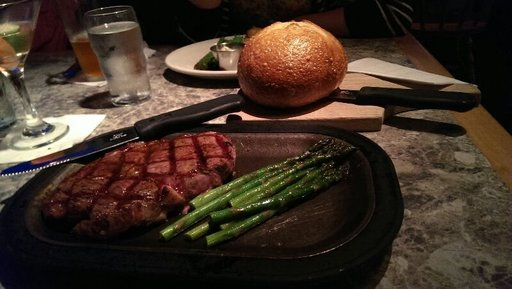

In [ ]:
import random
from PIL import Image


random.seed(50)


image_path_list = list(image_path.glob("*/*/*.jpg"))


random_image_path = random.choice(image_path_list)


image_class = random_image_path.parent.stem


img = Image.open(random_image_path)


print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

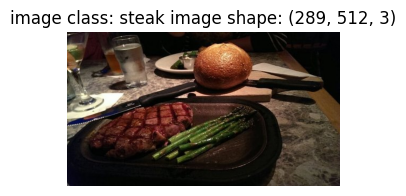

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(8, 2))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} image shape: {img_as_array.shape}")
plt.axis(False);

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

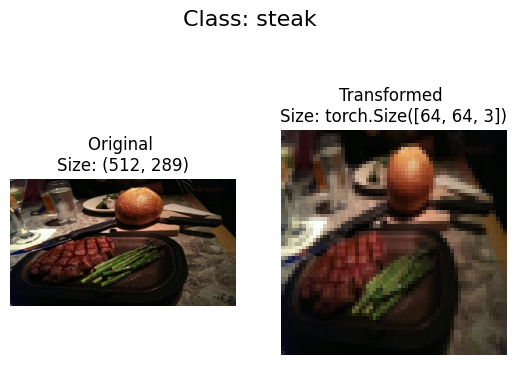

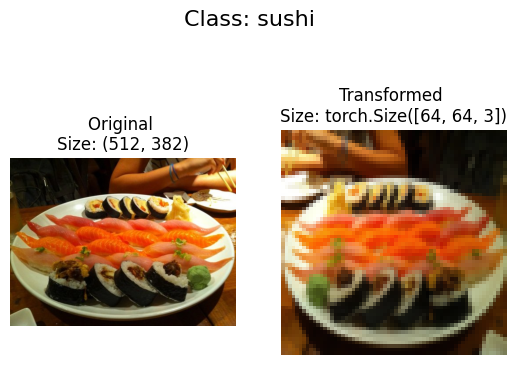

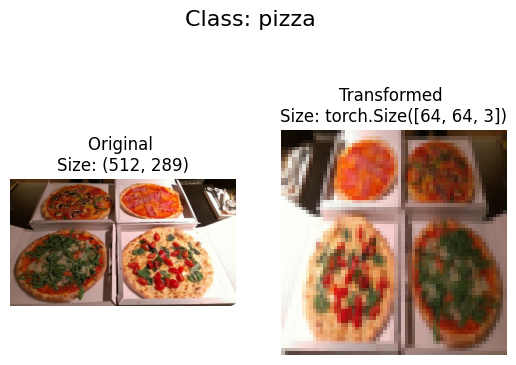

In [ ]:
def plot_transformed_images(image, transforms, n=3, seed=50):
  random.seed(seed)
  random_image_path = random.sample(image_path_list, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots (1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")
      transformed_image = transforms(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
plot_transformed_images(image_path_list, transforms=data_transform, n= 3)




In [ ]:
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir,
                                 transform= data_transform,
                                 target_transform = None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform


                                 )
print(f"Train data:\n {train_data}\nTest data: \n {test_data}")

Train data:
 Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data: 
 Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
simple_transform = transforms.Compose([transforms.Resize((64,64)),
                                       transforms.ToTensor()])

In [ ]:
train_data_simple= datasets.ImageFolder(root=train_dir,
                                 transform= simple_transform,
                                 )
test_data_simple = datasets.ImageFolder(root=test_dir,
                                 transform=simple_transform)

from torch.utils.data import dataloader
BATCH_SIZE =32
NUM_WORKERS=os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7d2c4bd61b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7d2c4bbc7a10>)

In [ ]:
device = "cuda" if torch.cuda.is_available()else "cpu"
device

'cpu'

In [ ]:

import torch
from torch import nn

In [ ]:
class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=3)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  model.train()
  train_loss, train_acc=0,0
  for batch,(X,y) in enumerate (dataloader):
    X,y =X.to(device), y.to(device)
    y_pred = model(X)
    loss= loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc +=(y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step (model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)

        test_pred_logits = model(X)
        loss = loss_fn(test_pred_logits, y)
        test_loss +=loss.item()

        test_pred_labels = test_pred_logits.argmax(dim=1)
        test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int= 5):


  results= {"train_loss": [],
            "train_acc": [],
            "test_loss": [],
            "test_acc": []}

  for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)


        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
  return results




In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0964 | train_acc: 0.3125 | test_loss: 1.1483 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.1187 | train_acc: 0.3203 | test_loss: 1.1422 | test_acc: 0.3125
Epoch: 8 | train_loss: 1.1015 | train_acc: 0.3555 | test_loss: 1.1051 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0893 | train_acc: 0.4688 | test_loss: 1.0686 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.0682 | train_acc: 0.4023 | test_loss: 1.0172 | test_acc: 0.5417
Total training time: 23.525 seconds


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


NUM_EPOCHS = 20


model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)


from timeit import default_timer as timer
start_time = timer()


model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0964 | train_acc: 0.3125 | test_loss: 1.1483 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.1187 | train_acc: 0.3203 | test_loss: 1.1422 | test_acc: 0.3125
Epoch: 8 | train_loss: 1.1015 | train_acc: 0.3555 | test_loss: 1.1051 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0893 | train_acc: 0.4688 | test_loss: 1.0686 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.0682 | train_acc: 0.4023 | test_loss: 1.0172 | test_acc: 0.5417
Epoch: 11 | train_loss: 1.0499 | train_acc: 0.4062 | test_loss: 0.9775 | test_acc: 0.5729
Epoch: 12 | train_l

In [ ]:

import requests
import zipfile
from pathlib import Path


data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"


if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.


In [ ]:
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_data_20_percent_path, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_data_20_percent_path,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: data/pizza_steak_sushi_20_percent/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 150
    Root location: data/pizza_steak_sushi_20_percent/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:

from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data, #
                                     batch_size=1,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data,
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7d2c4af251d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d2c4af25e10>)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


NUM_EPOCHS = 20


model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)


from timeit import default_timer as timer
start_time = timer()


model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_custom,
                        test_dataloader=test_dataloader_custom,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1035 | train_acc: 0.3711 | test_loss: 1.0888 | test_acc: 0.3933
Epoch: 2 | train_loss: 1.0930 | train_acc: 0.3378 | test_loss: 1.0984 | test_acc: 0.3067
Epoch: 3 | train_loss: 1.0990 | train_acc: 0.3022 | test_loss: 1.0995 | test_acc: 0.3067
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.0997 | test_acc: 0.3067
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3311 | test_loss: 1.1003 | test_acc: 0.3067
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3156 | test_loss: 1.1005 | test_acc: 0.3067
Epoch: 7 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1007 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1007 | test_acc: 0.3067
Epoch: 9 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1006 | test_acc: 0.3067
Epoch: 10 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1007 | test_acc: 0.3067
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3422 | test_loss: 1.1007 | test_acc: 0.3067
Epoch: 12 | train_l

In [ ]:
import torchvision
path ="/content/download (14).jpg"
img = torchvision.io.read_image(str(path)).type(torch.float32)


print(f"Custom image tensor:\n{img}\n")
print(f"Custom image shape: {img}\n")
print(f"Custom image dtype: {img}")

Custom image tensor:
tensor([[[57., 55., 60.,  ...,  3.,  3.,  3.],
         [53., 57., 55.,  ...,  3.,  3.,  3.],
         [47., 59., 64.,  ...,  3.,  3.,  3.],
         ...,
         [18., 18., 18.,  ..., 15., 14., 20.],
         [18., 18., 18.,  ..., 15., 14., 11.],
         [19., 17., 15.,  ..., 17., 17., 13.]],

        [[56., 54., 59.,  ...,  3.,  3.,  3.],
         [52., 56., 54.,  ...,  3.,  3.,  3.],
         [46., 58., 63.,  ...,  3.,  3.,  3.],
         ...,
         [18., 18., 18.,  ..., 15., 14., 20.],
         [18., 18., 18.,  ..., 15., 14., 11.],
         [19., 17., 15.,  ..., 17., 17., 13.]],

        [[62., 60., 65.,  ...,  3.,  3.,  3.],
         [58., 62., 60.,  ...,  3.,  3.,  3.],
         [52., 64., 69.,  ...,  3.,  3.,  3.],
         ...,
         [20., 20., 20.,  ..., 17., 16., 22.],
         [20., 20., 20.,  ..., 17., 16., 13.],
         [21., 19., 17.,  ..., 17., 17., 15.]]])

Custom image shape: tensor([[[57., 55., 60.,  ...,  3.,  3.,  3.],
         [53., 57

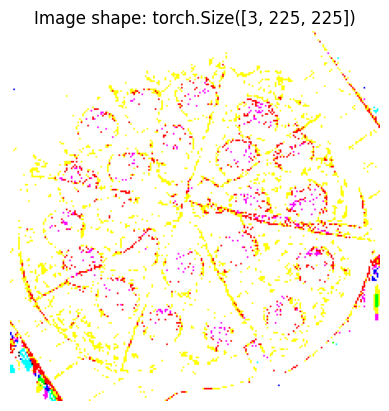

In [ ]:

plt.imshow(img.permute(1, 2, 0))
plt.title(f"Image shape: {img.shape}")
plt.axis(False);

In [ ]:

custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])


custom_image_transformed = custom_image_transform(img)


print(f"Original shape: {img.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 225, 225])
New shape: torch.Size([3, 64, 64])


In [ ]:
model_0.eval()
with torch.inference_mode():

    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)


    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")


    custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred

tensor([[-0.1078,  0.1344, -0.1857]])

In [ ]:

print(f"Prediction logits: {custom_image_pred}")


custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")


custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.1078,  0.1344, -0.1857]])
Prediction probabilities: tensor([[0.3126, 0.3983, 0.2892]])
Prediction label: tensor([1])


In [ ]:

custom_image_pred_class = class_names[custom_image_pred_label.cpu()]
custom_image_pred_class

'steak'

In [ ]:
import os
os.listdir()


['.config',
 'download (15).jpg',
 'drive',
 'data',
 'download (14).jpg',
 'sample_data']

In [ ]:
import nbformat

# Upload the file manually first
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    with open(filename, "r") as f:
        nb = nbformat.read(f, as_version=nbformat.NO_CONVERT)

    for cell in nb.cells:
        if "widgets" in cell.get("metadata", {}):
            del cell["metadata"]["widgets"]

    clean_name = f"cleaned_{filename}"
    with open(clean_name, "w") as f:
        nbformat.write(nb, f)

    print(f"Cleaned notebook saved as: {clean_name}")


Saving ass5.ipynb to ass5.ipynb
Cleaned notebook saved as: cleaned_ass5.ipynb
